<a href="https://colab.research.google.com/github/VarunPrabaharan16/MSc-Fraud-Detection/blob/main/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) for Fraud Detection
**Dataset**: IEEE-CIS Fraud Detection  
**Objective**: Analyze dataset features, check for class imbalance, and construct a graph for GNN input.  
**Stored in**: /MyDrive/msc-fraud-detection/data/ieee-fraud-detection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
data_path = '/content/drive/My Drive/MSc Fraud Detection/data/ieee-fraud-detection'
print(os.listdir(data_path))

['test_identity.csv', 'sample_submission.csv', 'test_transaction.csv', 'train_identity.csv', 'train_transaction.csv', 'sample_graph.pt', 'preprocessed_transactions.csv', 'preprocessed_transactions_no_identity.csv', 'label_encoders.pkl']


In [4]:
import pandas as pd
data_path = '/content/drive/My Drive/MSc Fraud Detection/data/ieee-fraud-detection'
transactions = pd.read_csv(f'{data_path}/train_transaction.csv')
print("Dataset Shape:", transactions.shape)
print(transactions.head())

Dataset Shape: (590540, 394)
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN

In [5]:
identity = pd.read_csv(f'{data_path}/train_identity.csv')
print("Identity Shape:", identity.shape)
print(identity.head())

Identity Shape: (144233, 41)
   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38 

In [6]:
# Check Basic Statistics: This shows means, min/max, and missing values, helping identify features for your model.
print(transactions.describe())  # Summary statistics for numerical columns
print(transactions.info())     # Data types and missing values

       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

In [7]:
# Analyze Class Imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Print exact counts
print(transactions['isFraud'].value_counts(normalize=True))

isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64


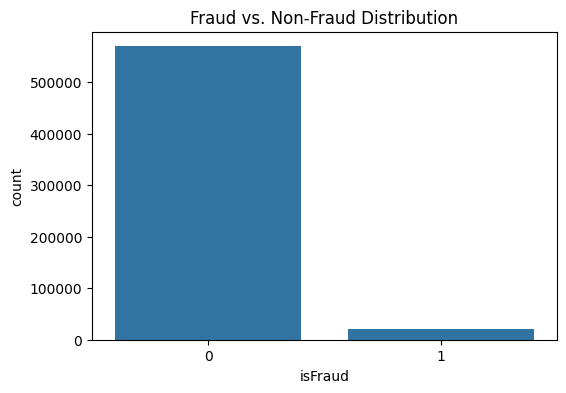

In [8]:
# Plot fraud vs. non-fraud distribution
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=transactions)
plt.title('Fraud vs. Non-Fraud Distribution')
plt.show()

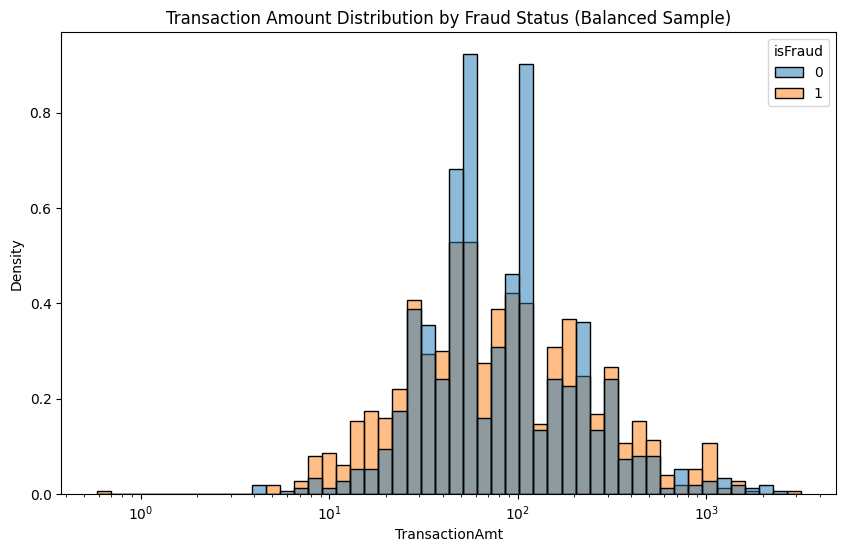

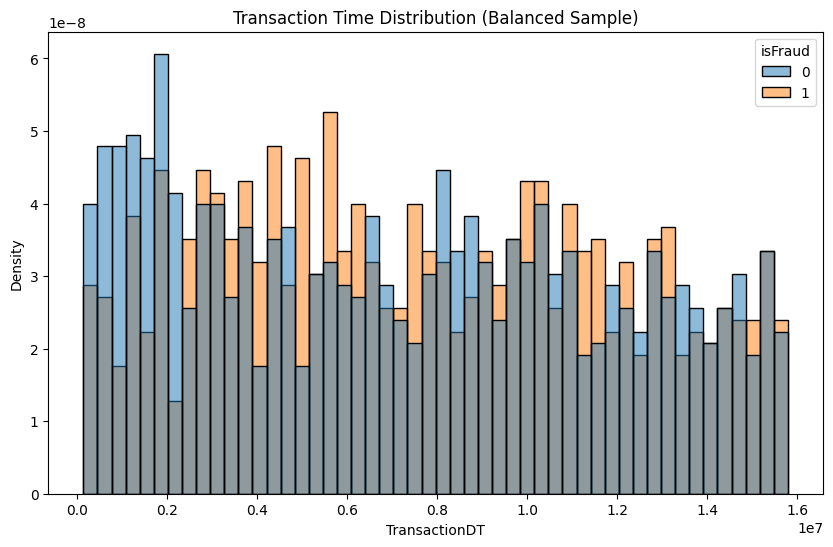

In [13]:
# Balanced sample for better visualization
fraud = transactions[transactions['isFraud'] == 1].sample(1000, random_state=42)
non_fraud = transactions[transactions['isFraud'] == 0].sample(1000, random_state=42)
balanced_sample = pd.concat([fraud, non_fraud])

# Transaction Amount Distribution with balanced sample
plt.figure(figsize=(10, 6))
sns.histplot(data=balanced_sample, x='TransactionAmt', hue='isFraud', bins=50, log_scale=True, stat='density')
plt.title('Transaction Amount Distribution by Fraud Status (Balanced Sample)')
plt.show()

# Transaction Time Distribution with balanced sample
plt.figure(figsize=(10, 6))
sns.histplot(data=balanced_sample, x='TransactionDT', hue='isFraud', bins=50, stat='density')
plt.title('Transaction Time Distribution (Balanced Sample)')
plt.show()

In [15]:
# Check Missing Values
missing = transactions.isnull().mean().sort_values(ascending=False)
print("Columns with Missing Values (%):")
print(missing[missing > 0])

Columns with Missing Values (%):
dist2    0.936284
D7       0.934099
D13      0.895093
D14      0.894695
D12      0.890410
           ...   
V293     0.000020
V299     0.000020
V298     0.000020
V302     0.000020
V285     0.000020
Length: 374, dtype: float64


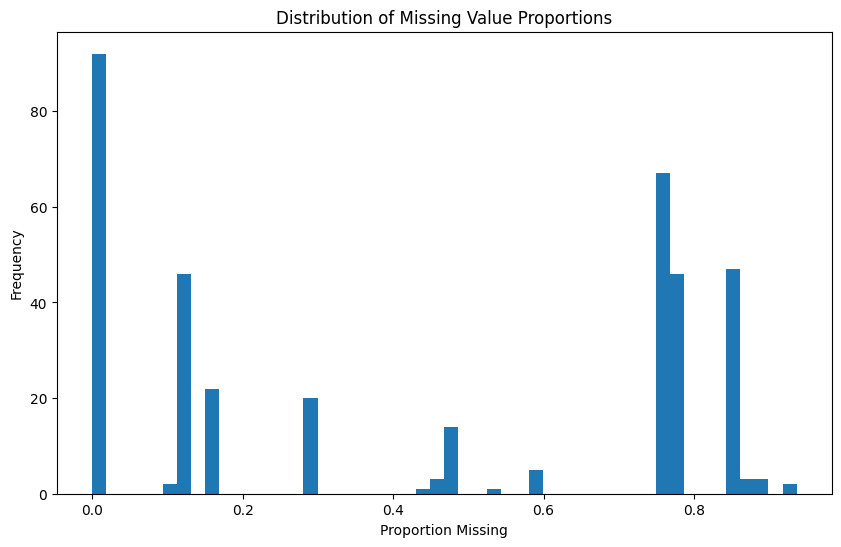

Columns with >50% missing: 174


In [16]:
plt.figure(figsize=(10,6))
missing[missing > 0].plot(kind='hist', bins=50)
plt.title('Distribution of Missing Value Proportions')
plt.xlabel('Proportion Missing')
plt.show()
print(f"Columns with >50% missing: {sum(missing > 0.5)}")

Number of Nodes: 1582
Number of Edges: 1504


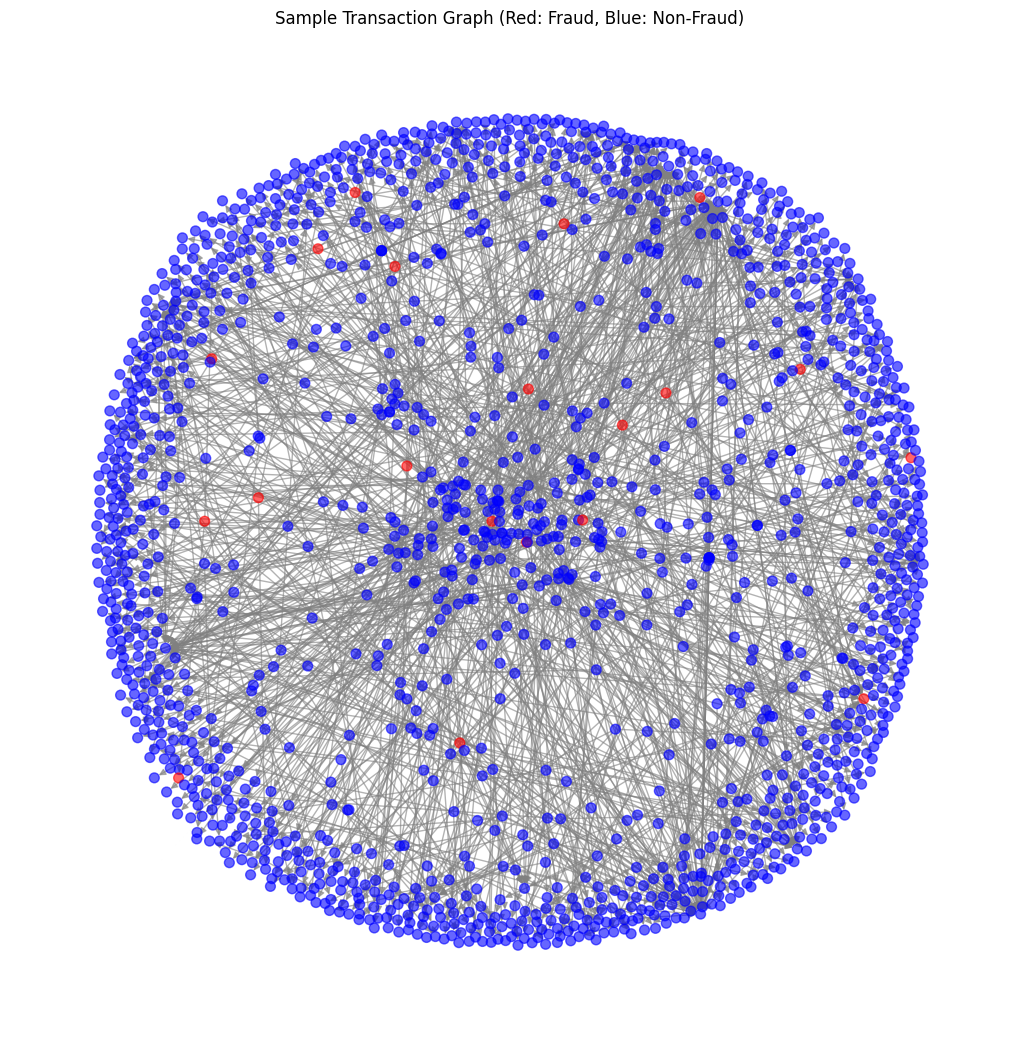

In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Merge transaction and identity data
merged_data = transactions.merge(identity, on='TransactionID', how='left')

# Sample a small subset for testing
sample = merged_data.sample(1000, random_state=42)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in sample.iterrows():
    # Use card1 as the primary node (e.g., user/card)
    card1 = row['card1']
    # Use card2 as the secondary node (e.g., another card involved in the transaction)
    card2 = row['card2'] if pd.notna(row['card2']) else f"unknown_{row['TransactionID']}"
    # Add device as another node (from identity data)
    device = row['DeviceInfo'] if pd.notna(row['DeviceInfo']) else f"device_{row['TransactionID']}"

    # Add nodes with attributes
    G.add_node(card1, fraud=row['isFraud'], type='card')
    G.add_node(card2, fraud=row['isFraud'], type='card')
    G.add_node(device, type='device')

    # Add edges: card1 -> card2 (transaction between cards)
    G.add_edge(card1, card2, amount=row['TransactionAmt'], time=row['TransactionDT'], type='transaction')
    # Add edges: card1 -> device (card used this device)
    G.add_edge(card1, device, type='used_device')

# Print graph info
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())

# Visualize with improved layout and coloring
plt.figure(figsize=(10, 10))
# Color nodes by fraud status
node_colors = ['red' if G.nodes[n].get('fraud', 0) == 1 else 'blue' for n in G.nodes()]
# Use spring layout for better separation
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=50, node_color=node_colors, edge_color='gray', alpha=0.6)
plt.title('Sample Transaction Graph (Red: Fraud, Blue: Non-Fraud)')
plt.show()

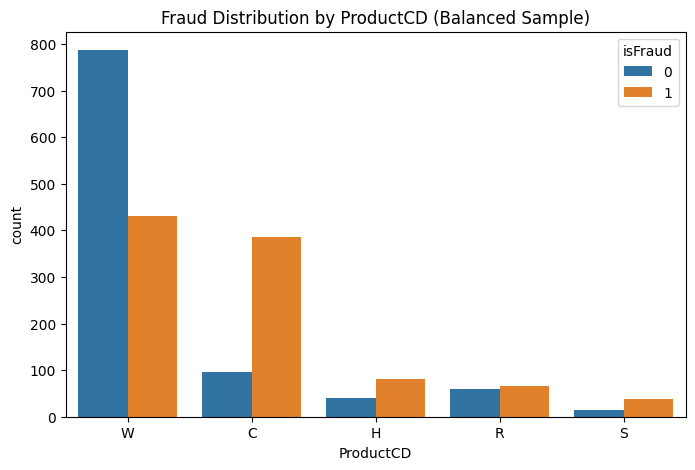

In [18]:
#Categorical Feature Analysis:
plt.figure(figsize=(8, 5))
sns.countplot(x='ProductCD', hue='isFraud', data=balanced_sample)
plt.title('Fraud Distribution by ProductCD (Balanced Sample)')
plt.show()

In [19]:
#Correlation Analysis
numeric_cols = transactions.select_dtypes(include=['float32', 'int64']).columns
corr = transactions[numeric_cols].corr()['isFraud'].sort_values(ascending=False)
print("Correlation with isFraud:\n", corr.head(10))

Correlation with isFraud:
 isFraud          1.000000
TransactionID    0.014166
TransactionDT    0.013103
card1           -0.013640
Name: isFraud, dtype: float64


In [20]:
#Missing Value Patterns
missing_by_fraud = transactions.groupby('isFraud').apply(lambda x: x.isnull().mean()).T
print("Missing Value Proportions by Fraud Status:\n", missing_by_fraud)

Missing Value Proportions by Fraud Status:
 isFraud                0         1
TransactionID   0.000000  0.000000
isFraud         0.000000  0.000000
TransactionDT   0.000000  0.000000
TransactionAmt  0.000000  0.000000
ProductCD       0.000000  0.000000
...                  ...       ...
V335            0.861961  0.821614
V336            0.861961  0.821614
V337            0.861961  0.821614
V338            0.861961  0.821614
V339            0.861961  0.821614

[394 rows x 2 columns]


<ipython-input-20-9a8547061d55>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_fraud = transactions.groupby('isFraud').apply(lambda x: x.isnull().mean()).T


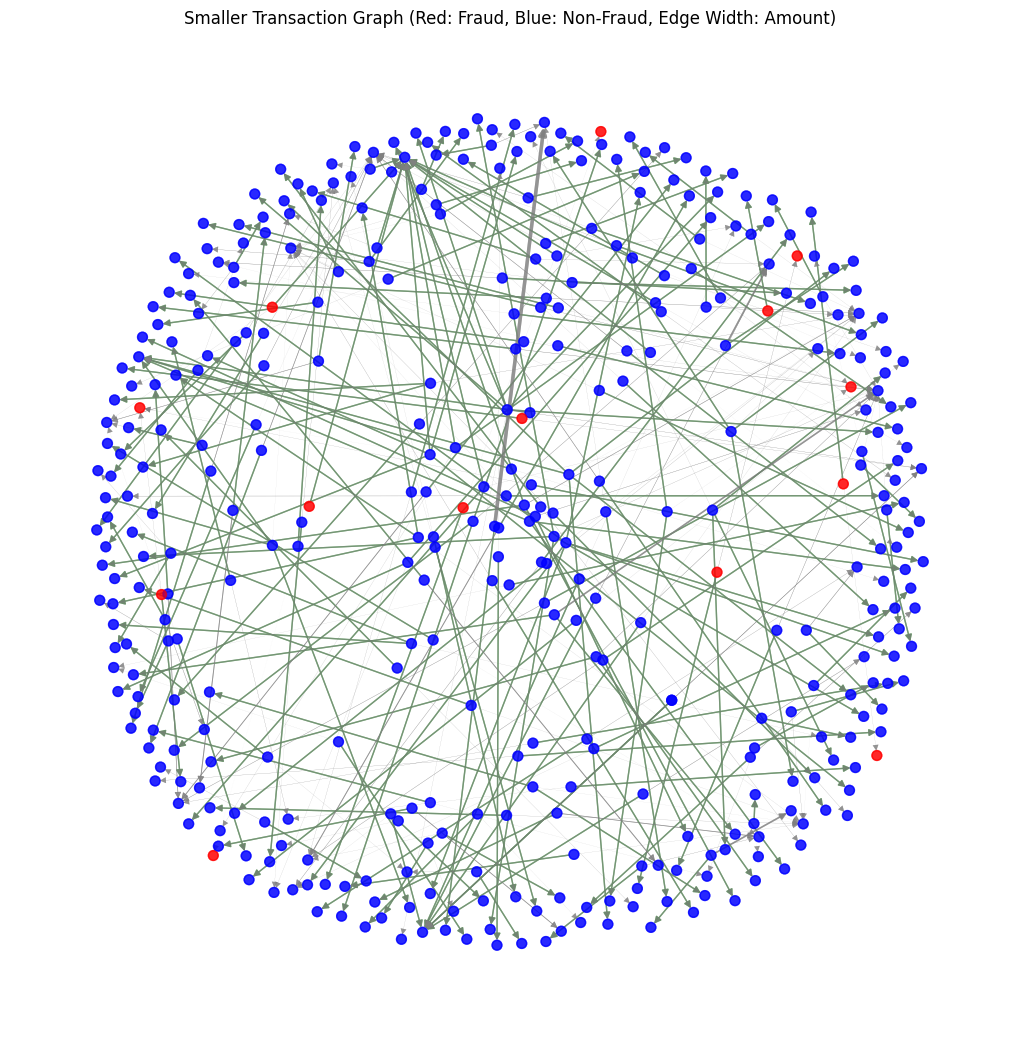

In [23]:
#Simpler Graph
small_sample = merged_data.sample(200, random_state=42)
G_small = nx.DiGraph()
for _, row in small_sample.iterrows():
    card1 = row['card1']
    card2 = row['card2'] if pd.notna(row['card2']) else f"unknown_{row['TransactionID']}"
    device = row['DeviceInfo'] if pd.notna(row['DeviceInfo']) else f"device_{row['TransactionID']}"
    G_small.add_node(card1, fraud=row['isFraud'], type='card')
    G_small.add_node(card2, fraud=row['isFraud'], type='card')
    G_small.add_node(device, type='device')
    G_small.add_edge(card1, card2, amount=row['TransactionAmt'], type='transaction')
    G_small.add_edge(card1, device, type='used_device')  # No amount for this edge

plt.figure(figsize=(10, 10))
node_colors = ['red' if G_small.nodes[n].get('fraud', 0) == 1 else 'blue' for n in G_small.nodes()]
pos = nx.spring_layout(G_small)
edges = G_small.edges(data=True)
# Add edge colors based on type
edge_colors = ['gray' if d.get('type') == 'transaction' else 'green' for (u, v, d) in edges]
nx.draw(G_small, pos, with_labels=False, node_size=50, node_color=node_colors, edge_color=edge_colors, width=edge_widths, alpha=0.6)
# Use a default width of 1.0 for edges without 'amount'
edge_widths = [d.get('amount', 1000)/1000 for (u, v, d) in edges]  # Default to 1000/1000 = 1.0 if 'amount' is missing
nx.draw(G_small, pos, with_labels=False, node_size=50, node_color=node_colors, edge_color='gray', width=edge_widths, alpha=0.6)
plt.title('Smaller Transaction Graph (Red: Fraud, Blue: Non-Fraud, Edge Width: Amount)')
plt.show()

## EDA Findings
- **Dataset Size**: [Insert shape, e.g., 590,540 transactions]
- **Class Imbalance**: [Insert fraud percentage, e.g., 3.5% fraud]
- **Key Features**: TransactionAmt, TransactionDT, card1, etc.
- **Graph Structure**: [Insert nodes/edges, e.g., 10,000 nodes, 1,000 edges in sample]
- **Next Steps**: Preprocess features, handle missing values, and finalize graph for GNN.